<a href="https://colab.research.google.com/github/BossOfTheCode/ml/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание 1


In [1]:
import math

def calc_entropy(ps):
    H = 0
    for p in ps:
        if p == 0:
            continue
        H += p * math.log2(p)
    return H if H == 0 else -H

In [2]:
ps1 = [0.2, 0.2, 0.2, 0.2, 0.2]
ps2 = [0.5, 0.5]
ps3 = [0.9, 0.05, 0.05, 0]
ps4 = [0, 0, 0, 0, 1, 0]

print(calc_entropy(ps1))
print(calc_entropy(ps2))
print(calc_entropy(ps3))
print(calc_entropy(ps4))

2.321928094887362
1.0
0.5689955935892812
0.0


Максимальное значение энтропии достигается, если вероятность всех исходов равна. 

В первом случае энтропия больше, чем во втором случае, потому что больше количество исходов

В последнем случае есть один исход с вероятностью единица, поэтому энтропия равна нулю

#Задание 2

#Задание 3

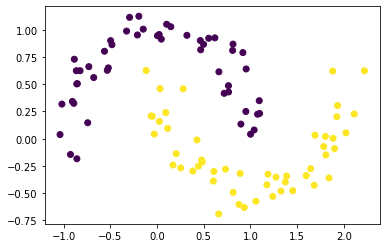

In [3]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


x, y = make_moons(n_samples=100, noise=0.1)
plt.scatter(x[:,0], x[:,1], c = y);

In [4]:
def draw_class_border(clf, X, Y,  h=.05, cmap=plt.cm.coolwarm):
  x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
  y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(7,7))
  plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
  plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=cmap)
  


def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_pred)

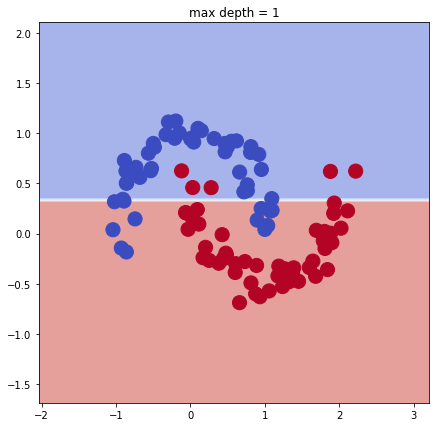

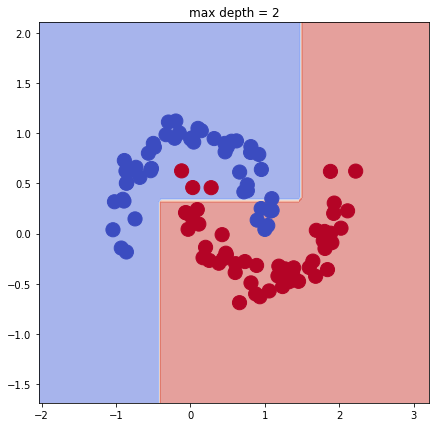

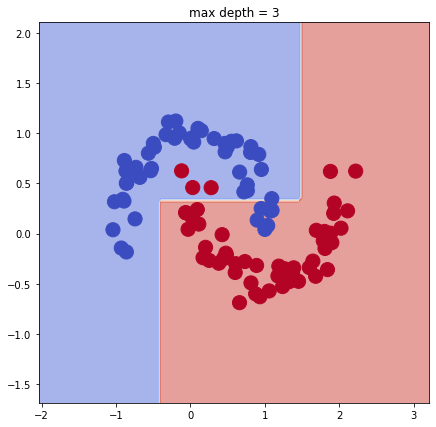

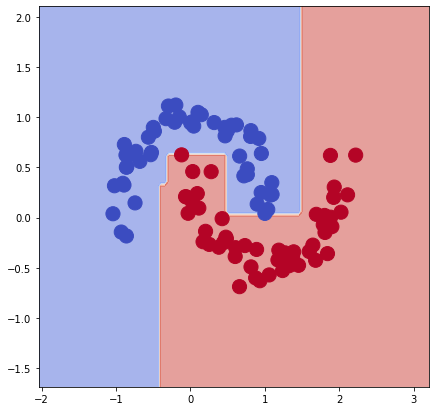

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


for k in range(1, 4):
    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(x_train, y_train)
    draw_class_border(clf, x, y)
    plt.title(f'max depth = {k}')
    plt.show()

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
draw_class_border(clf, x, y)
plt.show()